<a href="https://colab.research.google.com/github/queenhesti/TugasSisCerdas_TutorialTensorFlowdanKeras_2101037_Queen-Hesti-Ramadhamy/blob/main/Running_Program_SisCerdas_2101201037_Queen_Hesti_Ramadhamy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langkah pertama adalah melakukan penginstalan dan pengimportan model serta library pada simulasi untuk membuat fungsi yang diinginkan dari suatu bilangan.

In [72]:
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

! pip install tensorflow==2.4.0rc0

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
seed = 1
np.random.seed(seed)


*Catatan*:
Pada code diatas, pada code '**import os**' merupakan penginstalan os dan memberi jalur pada model file yan akan dijalankan. Lalu, pada code '**! pip instalasi library tensor flow==2.4.0rc0**' merupakan penginstalan terhadap library tensor flow. Kemudian pada code '**import tensorflow as tf**' merupakan pengimportan terhadap library tensorflow yang digunakan sebagai deep learning dan pada code '**from tensorflow import keras**' merupakan pengimportan terhadap library keras yang ada pada tensorflow. Lalu pada code '**import numpy as np**' dan code "**import pandas as pd**' yang merupakan pengimportan terhadap library numpy yang bekerja pada scientific computing dan library pandas yang bekerja untuk menganalisis data yang cocok untuk dianalisis. Selanjutnya ada code untuk '**import matplotlib.pyplot as plt**' dan '**import math**' yang masing-masingnya merupakan pengimprotan terhadap library matplotlib dan library math.

Langkah kedua adalah pembuatan angka yang menggunakan 5000 jumlah data untuk titik sample dan dilanjutkan dengan pemrosesan fungsi yang diinginkan pada bilangan tersebut dan pemplotingan yang berbentuk grafik.

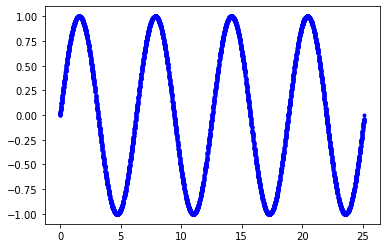

In [73]:
seed = 1
np.random.seed(seed)
SAMPLES = 5000
x_values = np.random.uniform(low=0, high=8*math.pi, size=SAMPLES).astype(np.float32) 
np.random.shuffle(x_values)
y_values = np.sin(x_values).astype(np.float32)
plt.plot(x_values, y_values, 'b.')
plt.show()


*Catatan*:
Pada code diatas, terdapat code '**np.random.seed(seed)**' yang digunakan untuk membuat angka yang dapat diprediksi secara acak. Terdapat juga code '**SAMPLES = 5000**' yang merupakan pendeklarasian jumlah data yang digunakan, jumlah ini dapat diubah sesuai dengan kebutuhan. Lalu terdapat juga code '**x_values = np.random.uniform(low=0, high=8*math.pi, size=SAMPLES).astype(np.float32)**' yang merupakan pemrosesan pengenerate an terhadap gelombang yang memiliki batas dari 0 sampai 4 phi, pada code ini dapat diubah-ubah sesuai dengan keinginan untuk melihat gelombang dari berapa sampai berapa. Kemudian terdapat code '**np.random.shuffle(x_values)**' yang merupakan proses shuffle untuk memastikan data tidak berurutan.Lalu code '**y_values = np.sin(x_values).astype(np.float32)**' merupakan perhitungan terhadap fungsi yang diinginkan, pada percobaan ini dilakukan fungsi sinus. Lalu yang selanjutnya adalah code '**plt.plot(x_values, y_values, 'b.')**' untuk memploting dalam bentuk grafik dari hasil yang didapat dari kalkulasi sebelumnya dan code '**plt.show()**' untuk menampilkan grafik dari plotingan tersebut.

Lalu selanjutnya melakukan penambahan bilangan random pada fungsi y untuk mendapatkan hasil data fungsi sinus (pada percobaan ini) menjadi random dan menggunakan code deep learning yag distimulasikan untuk memprediksi bentuk tidak random dari data sinus dan melakukan pemplotingan terhadap hasil yang didapat.

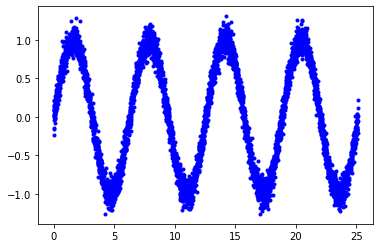

In [74]:
y_values += 0.1 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
plt.show()


Langkah selanjutnya adalah proses pembagian data set menjadi tiga bagian yaitu data train, data test, dan data validasi. Data train disini merupakan data yang akan digunakan untuk melatih algoritma yang akan digunakan, lalu data test merupakan data yang digunakan untuk mengetahui performa algoritma yang dilatih pada data train dan jika terdapat data baru didalamnya akan diubah menjadi lebih kecil dari sebelumnya untuk dilakukan proses pelatihan. Dan set terakhir adalah data validasi yang digunakan untuk proses validasi model untuk mencegah overfitting.

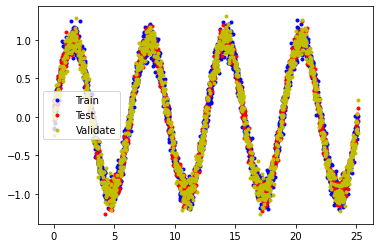

In [75]:
TRAIN_SPLIT =  int(0.5 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


*Catatan*:
Pada code '**TRAIN_SPLIT =  int(0.5 * SAMPLES)**' dan '**TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)**' merupakan pendeklarasian terhadap pembagian data set. Pada percobaan ini, perbandingan yang dilakukan adalah 0.5:0.2:0.3 yang dapat dituliskan juga sebagai data set yang digunakan adalah 20%, data train yang digunakan 50% dan 30% untuk data validasi. Kemudian terdapat code '**x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])**' dan '**y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])**' yang digunakan untuk membagi dataset menjadi 3 bagian sesuai dengan deklarasi sebelumnya. Lalu terdapat pula code '**assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES**' yang merupakan pemeriksaan terhadap kesesuaian data yang telah dibagi sebelumnya. Lalu code '**plt.plot(x_train, y_train, 'b.', label="Train")**', '**plt.plot(x_test, y_test, 'r.', label="Test")**', dan '**plt.plot(x_validate, y_validate, 'y.', label="Validate")**' digunakan untuk memploting hasil data dengan menggunakan warna yang berbeda yang ditunjukkan dengan 'r.' untuk test,'y.' untuk validate, dan 'b.' untuk train.

Langkah selanjutnya adalah membuat skenario. Untuk ***Skenario Satu***, dilakukan pemodelan 'keras' untuk deep learning dan juga melatih data yang telah dibagi seblumnya. Jumlah layer dan jumlah neuron dapat disesuaikan dengan yang dibutuhkan. Setelahnya dapat dilakukan konfigurasi pelatihan lalu data train akan dilakukan.

In [76]:
model_1 = tf.keras.Sequential()
model_1.add(keras.layers.Dense(10, activation='relu', input_shape=(1,)))
model_1.add(keras.layers.Dense(1))
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))


Epoch 1/500
40/40 [==============================] - 1s 6ms/step - loss: 1.1703 - mae: 0.8781 - val_loss: 0.5404 - val_mae: 0.6440
Epoch 2/500
40/40 [==============================] - 0s 3ms/step - loss: 0.5131 - mae: 0.6338 - val_loss: 0.5139 - val_mae: 0.6403
Epoch 3/500
40/40 [==============================] - 0s 2ms/step - loss: 0.5010 - mae: 0.6287 - val_loss: 0.5111 - val_mae: 0.6385
Epoch 4/500
40/40 [==============================] - 0s 2ms/step - loss: 0.5041 - mae: 0.6315 - val_loss: 0.5100 - val_mae: 0.6358
Epoch 5/500
40/40 [==============================] - 0s 2ms/step - loss: 0.5075 - mae: 0.6348 - val_loss: 0.5076 - val_mae: 0.6340
Epoch 6/500
40/40 [==============================] - 0s 2ms/step - loss: 0.4967 - mae: 0.6284 - val_loss: 0.5063 - val_mae: 0.6346
Epoch 7/500
40/40 [==============================] - 0s 2ms/step - loss: 0.4924 - mae: 0.6234 - val_loss: 0.5046 - val_mae: 0.6329
Epoch 8/500
40/40 [==============================] - 0s 2ms/step - loss: 0.4987 - m

*Catatan*:
Pada code diatas, terdapat code '**model_1 = tf.keras.Sequential()**' yang merupakan pendeklarasian terhadap model yang digunakan, pada percobaan ini digunakan model sequential. Lalu terdapat pula code '**model_1.add(keras.layers.Dense(10, activation='relu', input_shape=(1,)))**' yang bertujuan untuk memberi tahu bahwa jumlah hidden layer yang sedang digunakan berjumlah 1 layer yang dimana hidden layer tersebut akan ditambahkan lagi menggunakan Dense. Sedangkan angka 10 menunjukkan neuron yang berada pada hidden layer, relu yang merupakan fungsi aktivasi dan angka 1 yang merupakan jumlah neuron pada bagian input. Lalu terdapat code '**model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])**' yang digunakan untuk mengcompile data optimizer yang dimasukkan, pada percobaan ini digunakan optimizer adam. Lalu terdapat pula code '**history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_validate, y_validate))**', pada code ini terdapat epochs yang merupakan kondisi dimana seluruh dataset yang sudah melewati proses pelatihan pada neural network dan dikembalikan ke awal untuk satu kali putaran. Lalu pada code 'data_validasi', beberapa neuron yang menggunakan drop out tidak akan menjatuhkan neuron secara random dikarenakan selama pelatihan, penggunaan drop out dilakukan untuk menambah noise untuk menghindari pemasangan yang berlebihan.

Lalu selanjutnya akan ditampilkan grafik error dari hasil pelatihan yang dilakukan.

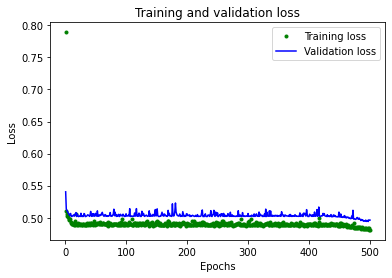

In [77]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



*Catatan*:
Pada code diatas terdapat val_loss yang merupakan nilai dari fungsi biaya untuk data validasi silang.

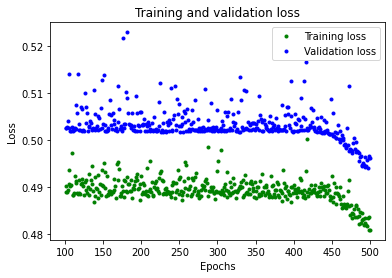

In [78]:
SKIP = 100
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


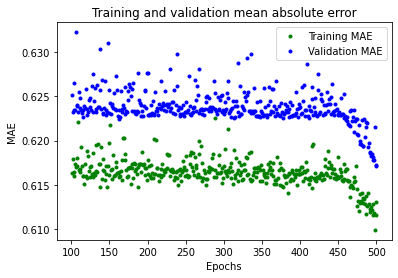

In [79]:
plt.clf()
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


Selanjutnya, dilakukan kalkulasi pada jumlah error yang dihasilkan dan melihat bentuk grafik mean absolute error. Lalu hasil perbandingan pada ***Skenario Satu*** menggunakan deep learning.

32/32 [==============================] - 0s 1ms/step - loss: 0.4713 - mae: 0.5983


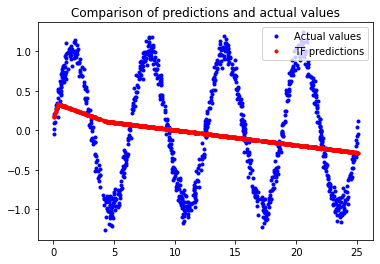

In [80]:
test_loss, test_mae = model_1.evaluate(x_test, y_test)
y_test_pred = model_1.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()


Selanjutnya melakukan ***Skenario Dua*** yang melakukan hal yang sama dengan ***Skenario Satu***. Yang membedakannya adalah jumlah hidden layer yang digunakan.

In [81]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(9, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(18, activation='relu')) 
model.add(keras.layers.Dense(27, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss="mse", metrics=["mae"])
history = model.fit(x_train, y_train, epochs=400, batch_size=64,validation_data=(x_validate, y_validate))
model.save(MODEL_TF)


Epoch 1/400
40/40 [==============================] - 1s 7ms/step - loss: 0.5704 - mae: 0.6494 - val_loss: 0.5036 - val_mae: 0.6323
Epoch 2/400
40/40 [==============================] - 0s 3ms/step - loss: 0.4978 - mae: 0.6258 - val_loss: 0.5031 - val_mae: 0.6291
Epoch 3/400
40/40 [==============================] - 0s 3ms/step - loss: 0.4755 - mae: 0.6068 - val_loss: 0.4852 - val_mae: 0.6133
Epoch 4/400
40/40 [==============================] - 0s 3ms/step - loss: 0.4639 - mae: 0.5983 - val_loss: 0.4871 - val_mae: 0.6043
Epoch 5/400
40/40 [==============================] - 0s 3ms/step - loss: 0.4603 - mae: 0.5876 - val_loss: 0.4693 - val_mae: 0.5958
Epoch 6/400
40/40 [==============================] - 0s 3ms/step - loss: 0.4665 - mae: 0.5880 - val_loss: 0.4692 - val_mae: 0.5861
Epoch 7/400
40/40 [==============================] - 0s 3ms/step - loss: 0.4642 - mae: 0.5810 - val_loss: 0.4648 - val_mae: 0.5868
Epoch 8/400
40/40 [==============================] - 0s 3ms/step - loss: 0.4499 - m

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets


*Catatan*:
Pada code diatas, terdapat code '**model.add(keras.layers.Dense(9, activation='relu', input_shape=(1,)))**', '**model.add(keras.layers.Dense(18, activation='relu'))**', '**model.add(keras.layers.Dense(27, activation='relu'))**', dan '**model.add(keras.layers.Dense(36, activation='relu'))** yang menunjukkan hidden layer yang berjumlah 4 layer yang dimana hidden layer tersebut akan ditambahkan lagi menggunakan Dense. Sedangkan angka 5, 10, dan 15 menunjukkan neuron yang berada pada hidden layer, relu yang merupakan fungsi aktivasi dan angka 1 yang merupakan jumlah neuron pada bagian input.

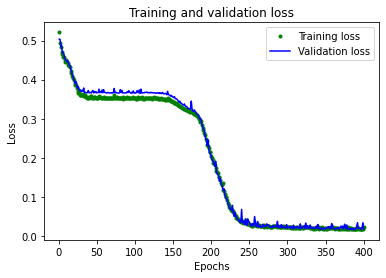

In [82]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


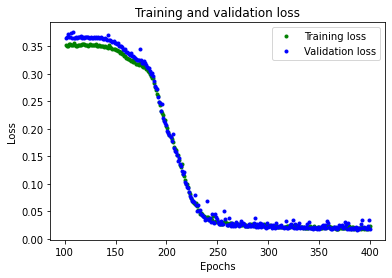

In [83]:
SKIP = 100
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

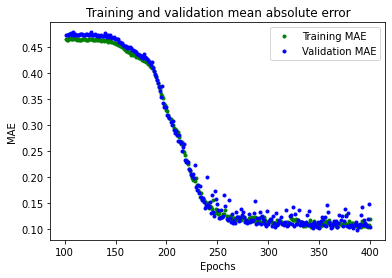

In [84]:
plt.clf()
train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Lalu, didapatkan hasil deep learning untuk ***Skenario Dua***

32/32 [==============================] - 0s 1ms/step - loss: 0.0165 - mae: 0.1003


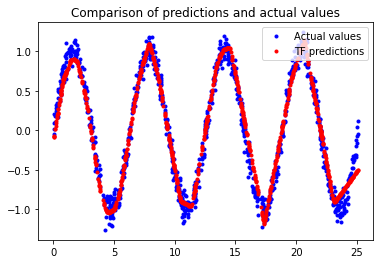

In [85]:
test_loss, test_mae = model.evaluate(x_test, y_test)
y_test_pred = model.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()
